In [ ]:
#Al actualizar los archivos importados del vivado (.bit, .hwh, .tcl) es necesario reiniciar el PL
from pynq import PL
PL.reset()

In [1]:
from pynq import Overlay, Clocks, allocate
#from pynq.overlays.base import BaseOverlay
import numpy as np
import matplotlib.pyplot as plt

overlay = Overlay('PWM.bit')
print(overlay.ip_dict.keys())

dict_keys(['axi_dma', 'ctrl_gpio', 'processing_system7_0'])


In [ ]:
overlay?
overlay.interrupt_pins

In [8]:
dma = overlay.axi_dma   #Direct Memory Access Object 

buffer_size = 256
output_buffer = allocate(shape=(buffer_size,), dtype = np.uint8)  #only write DMA mode
allocate?

In [3]:
ctrl_gpio = overlay.ctrl_gpio  #GPIO Object for duty_cycle modulation (channel1) and valid_data flag (channel2)

ctrl_gpio.write(4, 255)   #Activate tri-state channel1
ctrl_gpio.write(12, 255)  #Activate tri-state channel2

In [4]:
ctrl_gpio.write(8, 1)           #Write s_axis_tvalid (S_AXIS port STREAM DATA FIFO)

<h2>PWM signal generation</h2>

In [5]:
duty_cycle = 128                  #Write duty_cycle (8 bits - 0 --> 255)
ctrl_gpio.write(0, duty_cycle)



In [ ]:
#output buffer with FIFO data

dma.recvchannel.transfer(output_buffer)
dma.recvchannel.wait()
plt.plot(output_buffer)
plt.plot()
    

<IPython.core.display.Javascript object>


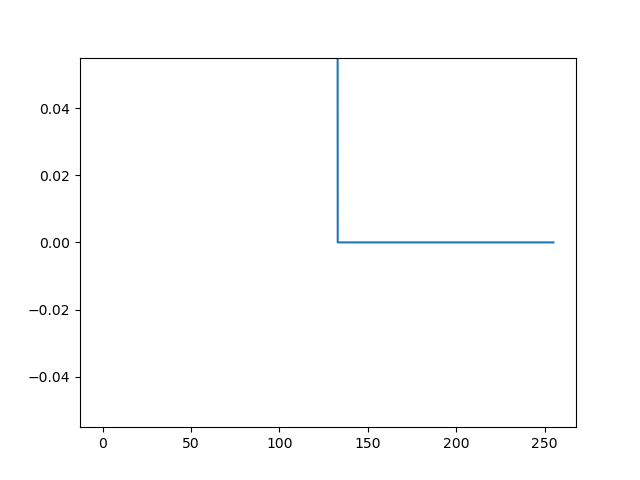

KeyboardInterrupt: 

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.ion()
plt.figure()
line, = plt.plot(output_buffer)

while True:
    dma.recvchannel.transfer(output_buffer)
    dma.recvchannel.wait()
    line.set_ydata(output_buffer)
    plt.draw()
    
plt.show()

In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

#PWM data generated

x = []
y = []

fig, ax = plt.subplots()
graph = ax.plot(output_buffer)[0]

def update(frame):
    global graph, dma
    
    dma.recvchannel.transfer(output_buffer)
    dma.recvchannel.wait()
    
    x.append(np.linspace(x[-1], x[-1]+254, 256))
    y.append(list(output_buffer))

    graph.set_xdata(x)
    graph.set_ydata(y)
    #plt.xlim(x[0], x[-1])

ani = FuncAnimation(fig, update, frames = 60)
plt.show()

In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

#PWM data generated

x = [1]
y = [0]

fig, ax = plt.subplots()
graph = ax.plot(output_buffer)[0]

def update(frame):
    global graph, dma
    
    dma.recvchannel.transfer(output_buffer)
    dma.recvchannel.wait()
    
    x.append(x[-1]+1)
    y.append(list(output_buffer))

    graph.set_xdata(x)
    graph.set_ydata(y)
    plt.xlim(x[0], x[-1])

ani = FuncAnimation(fig, update, frames = 60)
plt.show()

In [ ]:
p1 = np.array([0,1,1,1,1,1,0])
p2 = np.array([1,1,1,1,1,1,0])
p3 = np.array([0,0,0,1,1,1,0])
l=[]
for p in [p1, p2, p3]:
    l.append(p)

l